In [193]:
import pandas as pd
import numpy as np

## Library visualisasi
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import os
from scipy import stats
import scipy.stats as st
 
# ga perlu plt.show()
matplotlib.style.use('ggplot') # tema visualisasi kayak di R

In [180]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [17]:
path = '/content/gdrive/MyDrive/Class/train.csv'
data = pd.read_csv(path, delimiter=',')
data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,...,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,...,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,...,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,G

##Nomor 1

## Statistika Deskriptif

In [170]:
x = data['SalePrice']
x.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

##Ukuran Penyebaran

In [171]:
Jangkauan = x.max()-x.min()
print('Jangkauan =',Jangkauan)

Jangkauan = 720100


In [172]:
Simpangan_Kuartil = x.var()
print('Simpangan Kuartil =',Simpangan_Kuartil)

Simpangan Kuartil = 6311111264.297451


In [173]:
Jangkauan_Interquantil = x.quantile(0.75)-x.quantile(0.25)
print('Jangkauan Kuartil =',Jangkauan_Interquantil)

Jangkauan Kuartil = 84025.0


## Ukuran Pemusatan

In [174]:
Mean = x.mean()
print('Mean :',Mean)

Mean : 180921.19589041095


In [175]:
Median = x.median()
print('Median :',Median)

Median : 163000.0


In [176]:
Modus = x.mode()[0]
print('Modus :',Modus)

Modus : 140000


##Interpretasi

##Nomor 2

In [177]:
data1 =data.groupby(['YrSold'])['SalePrice']
data1.describe()

,count,mean,std,min,25%,50%,75%,max
YrSold,,,,,,,,
2006,314.0,182549.458599,79426.838855,35311.0,131375.0,163995.0,218782.5,625000.0
2007,329.0,186063.151976,85768.171410,39300.0,129900.0,167000.0,219500.0,755000.0
2008,304.0,177360.838816,69735.610685,40000.0,131250.0,164000.0,207000.0,446261.0
2009,338.0,179432.103550,80879.237311,34900.0,125250.0,162000.0,212750.0,582933.0
2010,175.0,177393.674286,80451.280085,55000.0,128100.0,155000.0,213250.0,611657.0


##Ukuran Pemusatan

In [160]:
data1.mean()

YrSold
2006    182549.458599
2007    186063.151976
2008    177360.838816
2009    179432.103550
2010    177393.674286
Name: SalePrice, dtype: float64

In [187]:
data1.median()

YrSold
2006    163995
2007    167000
2008    164000
2009    162000
2010    155000
Name: SalePrice, dtype: int64

In [192]:
data.groupby(['YrSold']).agg({'SalePrice': lambda x:stats.mode(x)[0]})

,SalePrice
YrSold,
2006,140000
2007,129000
2008,140000
2009,110000
2010,128000


##Ukuran Penyebaran

In [163]:
data1.var()

YrSold
2006    6.308623e+09
2007    7.356179e+09
2008    4.863055e+09
2009    6.541451e+09
2010    6.472408e+09
Name: SalePrice, dtype: float64

In [164]:
data1.max()-data1.min()

YrSold
2006    589689
2007    715700
2008    406261
2009    548033
2010    556657
Name: SalePrice, dtype: int64

In [197]:
data1.quantile(0.75)-data1.quantile(0.25)

YrSold
2006    87407.5
2007    89600.0
2008    75750.0
2009    87500.0
2010    85150.0
Name: SalePrice, dtype: float64

##Interpretasi

Dari tahun 2006 - 2010 tidak pernah adanya grafik stabil naik ataupun turun dikarenakan tiap tahunnya selalu naik turun. penjualan tertinggi berada pada tahun 2009 dengan penjualan 338 rata-rata 179432.103550. dan penjualan terendah berada pada tahun 2019 dengan penjualan 175 dengan rata-rata 177393.674286.

##Nomor 3

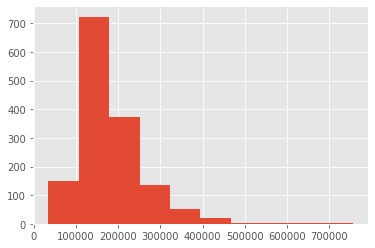

In [202]:
plt.hist(data['SalePrice'])
plt.show()

**Skew ke kanan** karena Mean > Median

Harga yang paling banyak berdasarkan tabel terdapat pada >100.000 & <200.000 dengan jumlah 700 unit


##Nomor 4